In [ ]:
from keras.layers import Conv2D, UpSampling2D, Input,Reshape
from keras.models import Sequential,Model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, gray2rgb, rgba2rgb
from skimage.transform import resize
from skimage.io import imsave
import os
import cv2
import numpy as np
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-08-02 17:06:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  86.4MB/s    in 1.7s    

2020-08-02 17:06:34 (86.4 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
!mv '/tmp/horse-or-human/' 'content/'

In [ ]:
!mv '/tmp/humans_train/' 'content1/'

In [ ]:
!ls content/humans/

human01-00.png	human04-13.png	human07-26.png	human11-08.png	human14-21.png
human01-01.png	human04-14.png	human07-27.png	human11-09.png	human14-22.png
human01-02.png	human04-15.png	human07-28.png	human11-10.png	human14-23.png
human01-03.png	human04-16.png	human07-29.png	human11-11.png	human14-24.png
human01-04.png	human04-17.png	human07-30.png	human11-12.png	human14-25.png
human01-05.png	human04-18.png	human08-00.png	human11-13.png	human14-26.png
human01-06.png	human04-19.png	human08-01.png	human11-14.png	human14-27.png
human01-07.png	human04-20.png	human08-02.png	human11-15.png	human14-28.png
human01-08.png	human04-21.png	human08-03.png	human11-16.png	human14-29.png
human01-09.png	human04-22.png	human08-04.png	human11-17.png	human14-30.png
human01-10.png	human04-23.png	human08-05.png	human11-18.png	human15-00.png
human01-11.png	human04-24.png	human08-06.png	human11-19.png	human15-01.png
human01-12.png	human04-25.png	human08-07.png	human11-20.png	human15-02.png
human01-13.png	human04-26

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('content/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('content/humans/')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse05-7.png', 'horse35-3.png', 'horse05-9.png', 'horse08-7.png', 'horse49-0.png', 'horse02-0.png', 'horse46-9.png', 'horse04-7.png', 'horse11-0.png', 'horse04-4.png']
['human10-05.png', 'human01-29.png', 'human10-10.png', 'human03-02.png', 'human12-20.png', 'human15-06.png', 'human14-17.png', 'human14-27.png', 'human13-02.png', 'human04-01.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [ ]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16()
newmodel = Sequential() 
#num = 0
for i, layer in enumerate(vggmodel.layers):
    if i<19:          
      newmodel.add(layer)
newmodel.summary()
for layer in newmodel.layers:
  layer.trainable=False

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
train_datagen =ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train = train_datagen.flow_from_directory(
        'content/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode=None)

Found 1027 images belonging to 2 classes.


In [ ]:
data=[]
for filename in os.listdir('humans'):
   print(filename)

human09-08.png
human13-30.png
human07-00.png
human04-13.png
human04-26.png
human17-06.png
human17-23.png
human03-13.png
human02-22.png
human03-10.png
human11-08.png
human09-19.png
human08-05.png
human01-03.png
human02-18.png
human03-27.png
human07-18.png
human13-21.png
human05-24.png
human17-21.png
human09-16.png
human02-25.png
human05-19.png
human04-08.png
human02-01.png
human10-09.png
human12-30.png
human09-22.png
human11-27.png
human05-26.png
human10-18.png
human02-20.png
human05-02.png
human04-27.png
human09-14.png
human01-07.png
human03-26.png
human02-15.png
human05-12.png
human04-00.png
human09-30.png
human15-17.png
human08-11.png
human16-06.png
human11-24.png
human03-19.png
human07-01.png
human12-25.png
human14-17.png
human16-17.png
human01-01.png
human08-19.png
human06-23.png
human11-16.png
human13-25.png
human03-14.png
human05-20.png
human03-17.png
human05-10.png
human08-28.png
human09-00.png
human08-00.png
human12-21.png
human02-11.png
human03-20.png
human15-10.png
human03-21

In [ ]:
from tqdm import tqdm
from skimage.io import imread

In [ ]:
X =[]
Y =[]
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
  path = TRAIN_PATH + id_+''
  print(path)
  img = imread(path)
  img = rgba2rgb(img)
  img = resize(img, (224, 224), mode='constant', preserve_range=True)
  img = img.astype('float32') / 255
  lab = rgb2lab(img)
  X.append(lab[:,:,0])
  Y.append(lab[:,:,1:] / 128)
    #except:
     #   print('error')

X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

NameError: ignored

In [ ]:
X =[]
Y =[]
for filename in os.listdir('humans'):
  path = 'humans/' + filename
  print(path)
  img = imread(path)
  img = rgba2rgb(img)
  img = resize(img, (224, 224), mode='constant', preserve_range=True)
  img = img.astype('float32') / 255
  lab = rgb2lab(img)
  X.append(lab[:,:,0])
  Y.append(lab[:,:,1:] / 128)
    #except:
     #   print('error')

X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

humans/human09-08.png
humans/human13-30.png
humans/human07-00.png
humans/human04-13.png
humans/human04-26.png
humans/human17-06.png
humans/human17-23.png
humans/human03-13.png
humans/human02-22.png
humans/human03-10.png
humans/human11-08.png
humans/human09-19.png
humans/human08-05.png
humans/human01-03.png
humans/human02-18.png
humans/human03-27.png
humans/human07-18.png
humans/human13-21.png
humans/human05-24.png
humans/human17-21.png
humans/human09-16.png
humans/human02-25.png
humans/human05-19.png
humans/human04-08.png
humans/human02-01.png
humans/human10-09.png
humans/human12-30.png
humans/human09-22.png
humans/human11-27.png
humans/human05-26.png
humans/human10-18.png
humans/human02-20.png
humans/human05-02.png
humans/human04-27.png
humans/human09-14.png
humans/human01-07.png
humans/human03-26.png
humans/human02-15.png
humans/human05-12.png
humans/human04-00.png
humans/human09-30.png
humans/human15-17.png
humans/human08-11.png
humans/human16-06.png
humans/human11-24.png
humans/hum

In [ ]:
vggfeatures = []
for i, sample in enumerate(X):
  sample = gray2rgb(sample)
  sample = sample.reshape((1,224,224,3))
  prediction = newmodel.predict(sample)
  prediction = prediction.reshape((7,7,512))
  vggfeatures.append(prediction)
vggfeatures = np.array(vggfeatures)
print(vggfeatures.shape)


(527, 7, 7, 512)


In [ ]:
model = Sequential()

model.add(Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(Conv2D(4, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.summary()


model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(vggfeatures, Y, verbose=1, epochs=10, batch_size=128)

model.save('colorize1_autoencoder_VGG16.model')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 7, 7, 256)         1179904   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         295040    
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 56, 56, 32)       

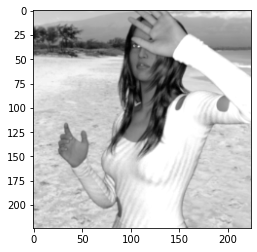

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


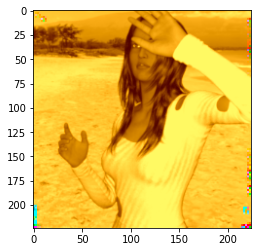

"\ntest = img_to_array(load_img('human1.jpeg'))\ntest = resize(test, (224,224), anti_aliasing=True)\ntest*= 1.0/255\ntest1=test.reshape(1,224,224,3)\nlab1 = rgb2lab(test)\nl = lab1[:,:,0]\nplt.imshow(l,cmap='gray')\nL = gray2rgb(l)\nL=L/255.0 \n#plt.imshow(L)\nL = L.reshape((1,224,224,3))\n"

In [ ]:
img = imread('content/humans/human16-20.png')
img = rgba2rgb(img)
img = resize(img, (224, 224), mode='constant', preserve_range=True)
img = img.astype('float32') / 255
lab = rgb2lab(img)
l = lab[:,:,0]
plt.imshow(l,cmap='gray')
plt.show()
#ab = (lab[:,:,1:] / 128)
sample = gray2rgb(l)
sample = sample.reshape((1,224,224,3))
vggpred1 = newmodel.predict(sample)
ab = model.predict(vggpred1)
ab = ab*128
cur = np.zeros((224, 224, 3))
cur[:,:,0] = l
cur[:,:,1:] = ab
predicted = lab2rgb(cur)
plt.imshow(predicted*255)
plt.show()
'''
test = img_to_array(load_img('human1.jpeg'))
test = resize(test, (224,224), anti_aliasing=True)
test*= 1.0/255
test1=test.reshape(1,224,224,3)
lab1 = rgb2lab(test)
l = lab1[:,:,0]
plt.imshow(l,cmap='gray')
L = gray2rgb(l)
L=L/255.0 
#plt.imshow(L)
L = L.reshape((1,224,224,3))
'''

In [ ]:
vggpred1 = newmodel.predict(test1)
ab = model.predict(vggpred1)

/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 49152 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


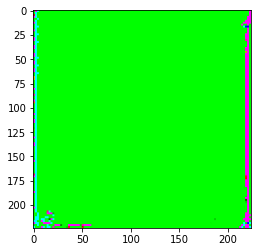

In [ ]:
ab = ab*128
cur = np.zeros((224, 224, 3))
cur[:,:,0] = l
cur[:,:,1:] = ab
plt.imshow(lab2rgb(cur))
#imsave('out_1.jpg', lab2rgb(cur))